In [1]:
from tvb.basic.profile import TvbProfile
TvbProfile.set_profile(TvbProfile.LIBRARY_PROFILE)

from tvb_nest.config import *
config = Config()
config.figures.SHOW_FLAG = True 
config.figures.SAVE_FLAG = True
config.figures.FIG_FORMAT = 'png'


2019-10-28 15:15:35,533 - INFO - numexpr.utils - NumExpr defaulting to 6 threads.


/home/docker/packages/tvb-library/tvb/datatypes/surfaces.py:61: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)


2019-10-28 15:15:36,344 - DEBUG - matplotlib - $HOME=/home/docker
2019-10-28 15:15:36,346 - DEBUG - matplotlib - CONFIGDIR=/home/docker/.config/matplotlib
2019-10-28 15:15:36,349 - DEBUG - matplotlib - matplotlib data path: /usr/share/matplotlib/mpl-data
2019-10-28 15:15:36,350 - DEBUG - matplotlib - loaded rc file /etc/matplotlibrc
2019-10-28 15:15:36,353 - DEBUG - matplotlib - matplotlib version 3.0.2
2019-10-28 15:15:36,354 - DEBUG - matplotlib - interactive is False
2019-10-28 15:15:36,355 - DEBUG - matplotlib - platform is linux
2019-10-28 15:15:36,357 - DEBUG - matplotlib - loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', 'zipimport', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_abc', '_bootlocale', '_locale', 'site', 'os', 'stat', '_stat', 'posixpath', 'genericpath', 'os.path', '_colle

2019-10-28 15:15:36,405 - DEBUG - matplotlib - CACHEDIR=/home/docker/.cache/matplotlib
2019-10-28 15:15:36,408 - DEBUG - matplotlib.font_manager - Using fontManager instance from /home/docker/.cache/matplotlib/fontlist-v300.json
2019-10-28 15:15:36,526 - DEBUG - matplotlib.pyplot - Loaded backend qt5agg version unknown.
2019-10-28 15:15:36,668 - DEBUG - matplotlib.pyplot - Loaded backend qt5agg version unknown.
2019-10-28 15:15:36,672 - DEBUG - matplotlib.pyplot - Loaded backend qt4agg version unknown.
2019-10-28 15:15:36,724 - DEBUG - matplotlib.pyplot - Loaded backend tkagg version unknown.
2019-10-28 15:15:36,729 - DEBUG - matplotlib.pyplot - Loaded backend agg version unknown.
2019-10-28 15:15:36,730 - DEBUG - matplotlib.pyplot - Loaded backend agg version unknown.
2019-10-28 15:15:36,735 - DEBUG - matplotlib.pyplot - Loaded backend nbAgg version unknown.


In [2]:
import nest

In [3]:
from pynestml.frontend.pynestml_frontend import install_nest  # to_nest, 
import os
nest_path = os.environ["NEST_INSTALL_DIR"]
modules_path = os.environ["MYMODULES_BLD_DIR"]
modules_and_models = {# "iaf_cond_deco2014": ["iaf_cond_deco2014"], 
                      # "iaf_cond_nmda_deco2014": ["iaf_cond_nmda_deco2014"], 
                      # "iaf_cond_ampa_gaba_deco2014": ["iaf_cond_ampa_gaba_deco2014"], 
                      # "scale_connection": ["scale_connection"], 
                      "tvb_rate_wongwang": ["tvb_rate_ampa_gaba_wongwang", "tvb_rate_nmda_wongwang", 
                                            "tvb_rate_redwongwang_exc", "tvb_rate_redwongwang_inh"]
                      }
for module, models in modules_and_models.items():
    models_path = os.path.join(modules_path, '%s' % module)
    # Compile models
    install_nest(models_path, nest_path)
    module_name = module + "module"
    # Intall into NEST
    nest.Install(module_name)
    for model in models:  
        print("\n" + model + "\n")
        try:
            print(nest.GetDefaults(model))
            n = nest.Create(model, 1)
            status=nest.GetStatus(n)
            print("\n" + model + "\n")
            print(status)
        except:
            n1 = nest.Create("iaf_cond_ampa_gaba_deco2014", 1)
            n2 = nest.Create("iaf_cond_nmda_deco2014", 1)
            nest.Connect(n1, n2, 
                         syn_spec={'model': "scale_connection", "receptor_type": 3, "weight": 1.0})
            nest.Connect(n2, n1, 
                         syn_spec={'model': "scale_connection", "receptor_type": 2, "weight": 1.0})
            print("\n" + str(nest.GetStatus(nest.GetConnections(n1))))
            print("\n" + str(nest.GetStatus(nest.GetConnections(n2))))


tvb_rate_ampa_gaba_wongwang

{'sigma': 0.01, 'archiver_length': 0, 'available': (0,), 'beta': 0.062, 'beta_Ca': 0.001, 'C_m': 500.0, 'Ca': 0.0, 'capacity': (0,), 'consistent_integration': True, 'E_ex': 0.0, 'E_in': -70.0, 'E_L': -70.0, 'element_type': <SLILiteral: neuron>, 'elementsize': 1064, 'frozen': False, 'g_L': 25.0, 'g_NMDA': 0.2, 'global_id': 0, 'I_e': 0.0, 'instantiations': (0,), 'local': True, 'model': <SLILiteral: tvb_rate_ampa_gaba_wongwang>, 'node_uses_wfr': True, 'post_trace': 0.0, 'receptor_types': {'NMDA': 3, 'AMPA_EXT': 1, 'AMPA_REC': 2, 'GABA': 4}, 'recordables': (<SLILiteral: I_syn>, <SLILiteral: S>, <SLILiteral: spike>, <SLILiteral: V_m>, <SLILiteral: noise_S>, <SLILiteral: noise_V_m>, <SLILiteral: s_AMPA_ext>, <SLILiteral: s_AMPA_rec>, <SLILiteral: s_NMDA>, <SLILiteral: s_GABA>, <SLILiteral: I_leak>, <SLILiteral: I_AMPA_ext>, <SLILiteral: I_AMPA_rec>, <SLILiteral: I_NMDA>, <SLILiteral: I_GABA>), 'rectify_output': True, 'S': 0.0, 'spike': 0.0, 'std': 0.01, 'support

In [4]:
from tvb_nest.simulator_nest.nest_factory import compile_modules
compile_modules("tvb_rate_wongwang")

In [5]:
nest.Models()

('ac_generator',
 'aeif_cond_alpha',
 'aeif_cond_alpha_RK5',
 'aeif_cond_alpha_multisynapse',
 'aeif_cond_beta_multisynapse',
 'aeif_cond_exp',
 'aeif_psc_alpha',
 'aeif_psc_delta',
 'aeif_psc_delta_clopath',
 'aeif_psc_exp',
 'amat2_psc_exp',
 'bernoulli_synapse',
 'bernoulli_synapse_lbl',
 'clopath_synapse',
 'clopath_synapse_lbl',
 'cont_delay_synapse',
 'cont_delay_synapse_hpc',
 'cont_delay_synapse_lbl',
 'correlation_detector',
 'correlomatrix_detector',
 'correlospinmatrix_detector',
 'dc_generator',
 'diffusion_connection',
 'diffusion_connection_lbl',
 'erfc_neuron',
 'gamma_sup_generator',
 'gap_junction',
 'gap_junction_lbl',
 'gauss_rate_ipn',
 'gif_cond_exp',
 'gif_cond_exp_multisynapse',
 'gif_pop_psc_exp',
 'gif_psc_exp',
 'gif_psc_exp_multisynapse',
 'ginzburg_neuron',
 'hh_cond_beta_gap_traub',
 'hh_cond_exp_traub',
 'hh_psc_alpha',
 'hh_psc_alpha_clopath',
 'hh_psc_alpha_gap',
 'ht_neuron',
 'ht_synapse',
 'ht_synapse_hpc',
 'ht_synapse_lbl',
 'iaf_chs_2007',
 'iaf_ch

In [6]:
# import pyNN.nest as sim; sim.setup(); sim.end(); print(sim)

In [7]:
from tvb_nest.config import CONFIGURED
from tvb.datatypes.connectivity import Connectivity
# Select the regions for the fine scale modeling with NEST spiking networks
nest_nodes_ids = []  # the indices of fine scale regions modeled with NEST
# In this example, we model parahippocampal cortices (left and right) with NEST
connectivity = Connectivity.from_file(config.DEFAULT_CONNECTIVITY_ZIP)
for id in range(connectivity.region_labels.shape[0]):
    if connectivity.region_labels[id].find("hippo") > 0:
        nest_nodes_ids.append(id)

2019-10-28 15:35:40,821 - DEBUG - matplotlib.pyplot - Loaded backend module://ipykernel.pylab.backend_inline version unknown.
2019-10-28 15:35:40,857 - DEBUG - matplotlib.colorbar - locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f271ef2f240>
2019-10-28 15:35:40,858 - DEBUG - matplotlib.colorbar - Using auto colorbar locator on colorbar
2019-10-28 15:35:40,859 - DEBUG - matplotlib.colorbar - locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f271ef2f240>
2019-10-28 15:35:40,860 - DEBUG - matplotlib.colorbar - Setting pcolormesh
2019-10-28 15:35:40,945 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:35:40,946 - DEBUG - matplotlib.axes._base - not adjusting title pos because title was already placed manually: 1.050000
2019-10-28 15:35:41,171 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:35:41,228 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:35:41,229 - DEBUG - matplotlib.axes._base - title position was u

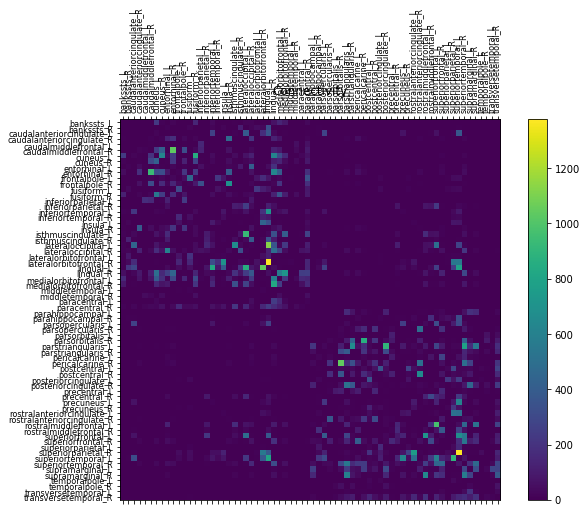

2019-10-28 15:35:42,679 - DEBUG - matplotlib.colorbar - locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f2724af2128>
2019-10-28 15:35:42,680 - DEBUG - matplotlib.colorbar - Using auto colorbar locator on colorbar
2019-10-28 15:35:42,681 - DEBUG - matplotlib.colorbar - locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f2724af2128>
2019-10-28 15:35:42,682 - DEBUG - matplotlib.colorbar - Setting pcolormesh
2019-10-28 15:35:42,768 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:35:42,769 - DEBUG - matplotlib.axes._base - not adjusting title pos because title was already placed manually: 1.050000
2019-10-28 15:35:43,054 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:35:43,106 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:35:43,107 - DEBUG - matplotlib.axes._base - title position was updated manually, not adjusting
2019-10-28 15:35:43,340 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:35:43,

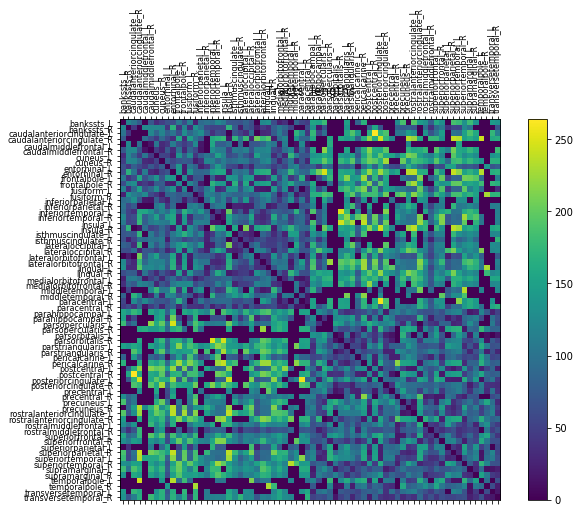

2019-10-28 15:35:44,657 - INFO - tvb_nest.simulator_nest.models.devices - <class 'tvb_nest.simulator_nest.models.devices.NESTDeviceSet'> of model spike_detector for E spikes created!
2019-10-28 15:35:44,657 - INFO - tvb_nest.simulator_nest.models.devices - <class 'tvb_nest.simulator_nest.models.devices.NESTDeviceSet'> of model spike_detector for E spikes created!
2019-10-28 15:35:44,680 - INFO - tvb_nest.simulator_nest.models.devices - <class 'tvb_nest.simulator_nest.models.devices.NESTDeviceSet'> of model spike_detector for I spikes created!
2019-10-28 15:35:44,680 - INFO - tvb_nest.simulator_nest.models.devices - <class 'tvb_nest.simulator_nest.models.devices.NESTDeviceSet'> of model spike_detector for I spikes created!
2019-10-28 15:35:44,693 - INFO - tvb_nest.simulator_nest.models.devices - <class 'tvb_nest.simulator_nest.models.devices.NESTDeviceSet'> of model multimeter for E V_m created!
2019-10-28 15:35:44,693 - INFO - tvb_nest.simulator_nest.models.devices - <class 'tvb_nest.s

2019-10-28 15:35:51,158 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:35:51,249 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:35:51,265 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:35:51,294 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:35:51,307 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:35:51,331 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:35:51,350 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:35:51,369 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:35:51,380 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:35:51,453 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:35:51,480 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:35:51,504 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:35:51,516 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:35:51,546 -

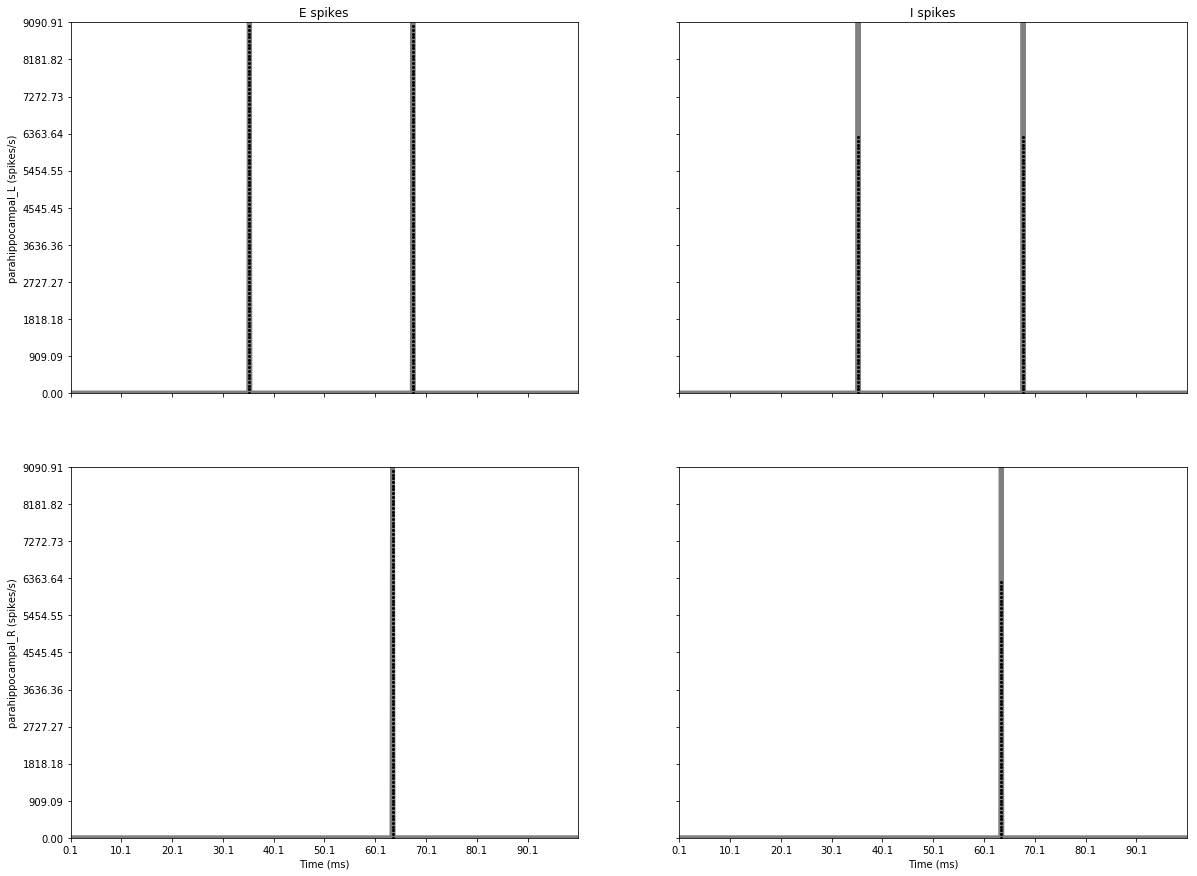

2019-10-28 15:35:51,897 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:35:53,163 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:35:54,501 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:35:55,651 - DEBUG - matplotlib.axes._base - update_title_pos


<Figure size 432x288 with 0 Axes>

2019-10-28 15:35:56,795 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:35:57,859 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:35:59,199 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:35:59,226 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:35:59,287 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:35:59,314 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:35:59,344 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:36:00,569 - DEBUG - matplotlib.axes._base - update_title_pos


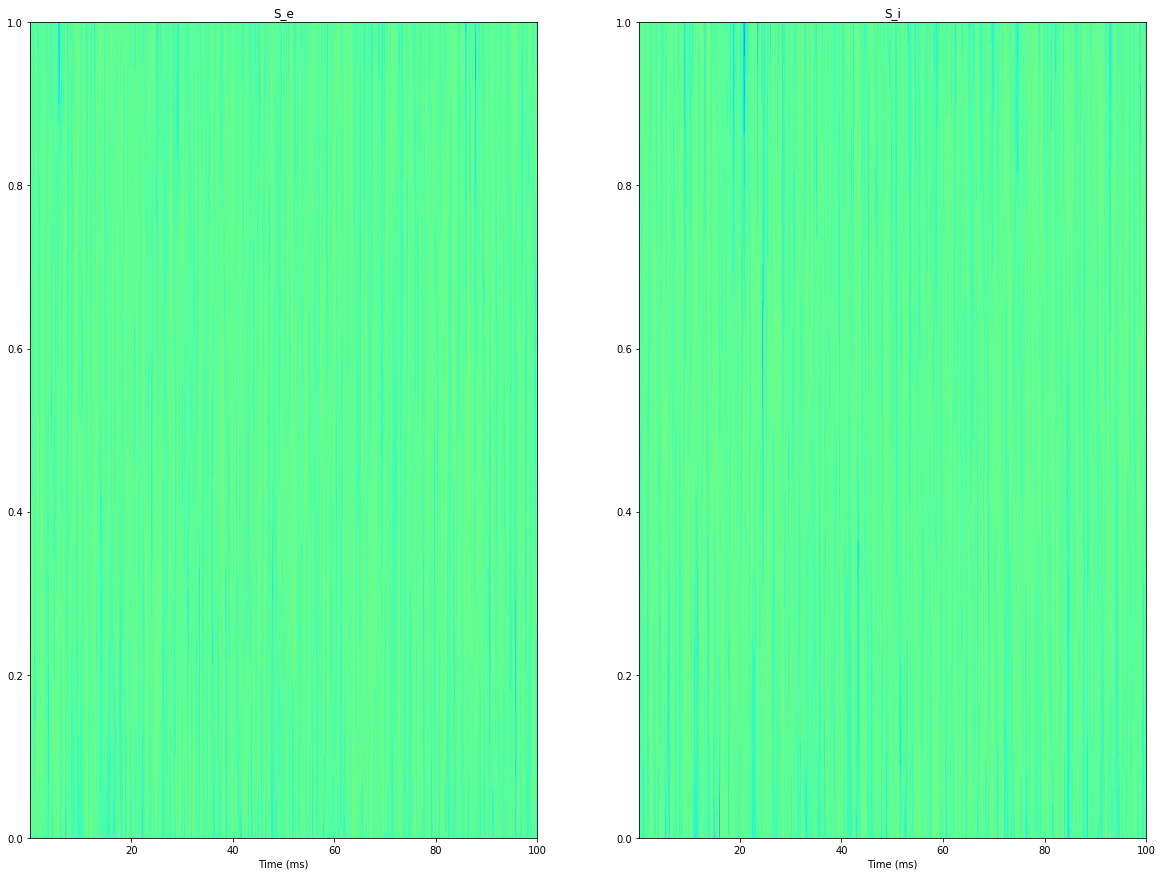

2019-10-28 15:36:02,004 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:36:02,201 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:36:02,817 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:36:03,010 - DEBUG - matplotlib.axes._base - update_title_pos


<Figure size 432x288 with 0 Axes>

2019-10-28 15:36:03,201 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:36:03,391 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:36:03,858 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:36:03,981 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:36:04,247 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:36:04,373 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:36:04,527 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:36:04,742 - DEBUG - matplotlib.axes._base - update_title_pos


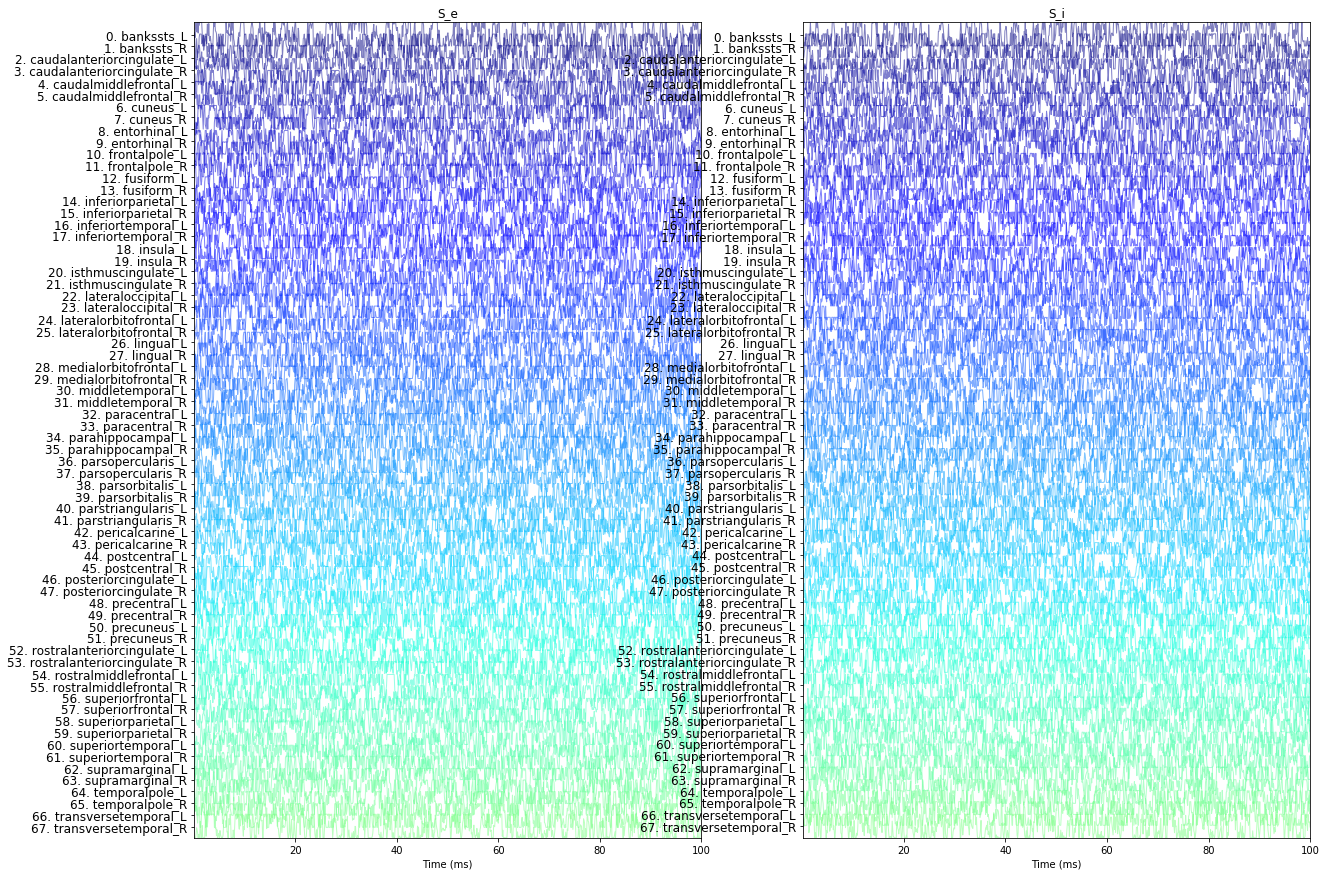

2019-10-28 15:36:05,267 - INFO - tvb_scripts.plot.time_series_interactive_plotter - Generating an interactive time-series plot for TimeSeriesRegion
2019-10-28 15:36:05,267 - INFO - tvb_scripts.plot.time_series_interactive_plotter - Generating an interactive time-series plot for TimeSeriesRegion
2019-10-28 15:36:05,316 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:36:05,341 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:36:05,343 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:36:05,366 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:36:05,382 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:36:05,383 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:36:05,387 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:36:05,676 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:36:05,906 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:36:05,907 - DEB

<Figure size 432x288 with 0 Axes>

2019-10-28 15:36:05,957 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:36:06,194 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:36:06,195 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:36:06,200 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:36:06,209 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:36:06,213 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:36:06,220 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:36:06,225 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:36:06,229 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:36:06,233 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:36:06,379 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:36:06,532 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:36:06,542 - DEBUG - matplotlib.axes._base - update_title_pos
2019-10-28 15:36:06,553 -

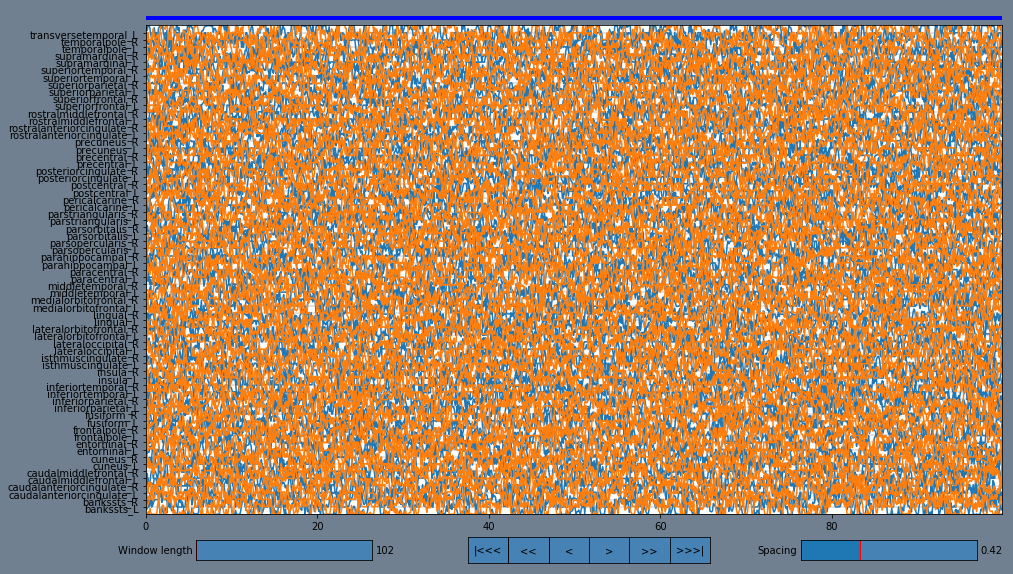

In [10]:
# For interactive plotting:
# %matplotlib notebook  

# Otherwise:
%matplotlib inline 

from tvb_nest.examples.example import main_example
from tvb_nest.simulator_tvb.model_reduced_wong_wang_exc_io_inh_i import ReducedWongWangExcIOInhI
from tvb_nest.simulator_nest.models_builders.red_ww_exc_io_inh_i import RedWWExcIOInhIBuilder
from tvb_nest.simulator_nest.models_builders.red_rate_ww_exc_io_inh_i import RedRateWWExcIOInhIBuilder
from tvb_nest.simulator_nest.models_builders.rate_ww_ampa_nmda_gaba import RateWWAMPANMDAGABABuilder
from tvb_nest.simulator_nest.models_builders.ww_ampa_nmda_gaba import WWAMPANMDAGABABuilder
from tvb_nest.simulator_nest.models_builders.ww_deco2014 import WWDeco2014Builder
from tvb_nest.interfaces.builders.red_ww_exc_io_inh_i \
    import RedWWexcIOinhIBuilder as InterfaceRedWWexcIOinhIBuilder
from tvb_nest.interfaces.builders.red_rate_ww_exc_io_inh_i \
    import RedRateWWexcIOinhIBuilder as InterfaceRedRateWWexcIOinhIBuilder
from tvb_nest.interfaces.builders.rate_ww_ampa_nmda_gaba \
    import RateWWAMPANMDAGABABuilder as InterfaceRateWWAMPANMDAGABABuilder
from tvb_nest.interfaces.builders.ww_ampa_nmda_gaba \
    import WWAMPANMDAGABABuilder as InterfaceWWAMPANMDAGABABuilder
from tvb_nest.interfaces.builders.ww_deco2014 \
    import WWDeco2014Builder as InterfaceWWDeco2014Builder
main_example(ReducedWongWangExcIOInhI(), RedWWExcIOInhIBuilder, InterfaceRedWWexcIOinhIBuilder,
             nest_nodes_ids, nest_populations_order=100, connectivity=connectivity, simulation_length=100.0,
             tvb_state_variable_type_label="Synaptic Gating Variable", tvb_state_variables_labels=["S_e", "S_i"],
             dt=0.1, config=config)